#1: Data Exploration

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Loading the Data

In [106]:
# Loading the raw data
df = pd.read_csv('../data/raw/MCHB_Data_GranteeDetails.csv', encoding='utf-8-sig')

print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset shape: 4946 rows, 12 columns

Memory usage: 4.04 MB


## Initial Data

In [107]:
# First look at the data
df.head(10)

,Program Area,Program Name,Fiscal Year,Activity Code,Grant Number,Grantee Name,State,County,Congressional District,Grantee Class,Awardee Amount,Grantee Contact Details
0,Maternal and Child Health,Healthy Start Initiative-Eliminating Racial/Et...,2021,H49,H49MC27827,Birmingham Healthy Start Plus Inc,AL,Jefferson,AL-06,"Corporate Entity, Federal Tax Exempt","$1,269,121","1105 52nd St S Birmingham, AL 35222-3924"
1,Maternal and Child Health,Maternal and Child Health Nutrition Training P...,2021,T79,T79MC00011,University Of Alabama At Birmingham,AL,Jefferson,AL-07,Other,"$225,000","701 20th St S Birmingham, AL 35233-2031"
2,Maternal and Child Health,Leadership Education in Adolescent Health (LEAH),2021,T71,T71MC24209,University Of Alabama At Birmingham,AL,Jefferson,AL-07,Other,"$437,942","701 20th St S Birmingham, AL 35233-2031"
3,Maternal and Child Health,Leadership Education in Neurodevelopmental and...,2021,T73,T73MC00003,University Of Alabama At Birmingham,AL,Jefferson,AL-07,Other,"$713,466","701 20th St S Birmingham, AL 35233-2031"
4,Maternal and Child Health,Pediatric Pulmonary Centers,2021,T72,T72MC00001,University Of Alabama At Birmingham,AL,Jefferson,AL-07,Other,"$340,000","701 20th St S Birmingham, AL 35233-2031"
5,Maternal and Child Health,Sickle Cell Treatment Demonstration Program,2021,U1E,U1EMC42461,University Of Alabama At Birmingham,AL,Jefferson,AL-07,Other,"$1,150,000","701 20th St S Birmingham, AL 35233-2031"
6,Maternal and Child Health,Family Professional Partnership/CSHCN,2021,H84,H84MC12901,"FAMILY VOICES OF ALABAMA, INC.",AL,Mobile,AL-01,"Corporate Entity, Federal Tax Exempt","$96,750","1050 Government St Mobile, AL 36604-2404"
7,Maternal and Child Health,Healthy Start Initiative-Eliminating Racial/Et...,2021,H49,H49MC27816,GIFT OF LIFE FOUNDATION,AL,Montgomery,AL-02,"Corporate Entity, Federal Tax Exempt","$985,898","1348 Carmichael Way Montgomery, AL 36106-3694"
8,Maternal and Child Health,EMSC Partnership Grants,2021,H33,H33MC06713,"PUBLIC HEALTH, ALABAMA DEPARTMENT OF",AL,Montgomery,AL-02,U.S. Government Entity,"$130,000","201 Monroe St Ste 1050 Montgomery, AL 36104-6..."
9,Maternal and Child Health,Maternal and Child Health Services,2021,B04,B04MC40113,"PUBLIC HEALTH, ALABAMA DEPARTMENT OF",AL,Montgomery,AL-02,U.S. Government Entity,"$11,523,951","201 Monroe St Ste 1050 Montgomery, AL 36104-6..."


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4946 entries, 0 to 4945
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Program Area             4946 non-null   object 
 1   Program Name             4946 non-null   object 
 2   Fiscal Year              4946 non-null   int64  
 3   Activity Code            4946 non-null   object 
 4   Grant Number             4946 non-null   object 
 5   Grantee Name             4946 non-null   object 
 6   State                    4946 non-null   object 
 7   County                   4946 non-null   object 
 8   Congressional District   4946 non-null   object 
 9   Grantee Class            4946 non-null   object 
 10  Awardee Amount           4946 non-null   object 
 11  Grantee Contact Details  4946 non-null   object 
 12  amount_clean             4946 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 502.5+ KB


In [127]:
# columns
print("Columns in dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Columns in dataset:
1. Program Area
2. Program Name
3. Fiscal Year
4. Activity Code
5. Grant Number
6. Grantee Name
7. State
8. County
9. Congressional District
10. Grantee Class
11. Awardee Amount
12. Grantee Contact Details
13. amount_clean


## Key Variables

In [128]:
#program areas
print("Program Areas:")
print(df['Program Area'].value_counts())

Program Areas:
Program Area
Maternal and Child Health    4946
Name: count, dtype: int64


In [129]:
# number of program types
print(f"Number of unique programs: {df['Program Name'].nunique()}")
print("\nTop 15 programs by grant count:")
print(df['Program Name'].value_counts().head(15))

Number of unique programs: 127

Top 15 programs by grant count:
Program Name
Healthy Start Initiative-Eliminating Racial/Ethnic Disparities                       607
Universal Newborn Hearing Screening and Intervention                                 354
Maternal and Child Health Services                                                   354
MCHB State Systems Development Initiative                                            350
EMSC Partnership Grants                                                              348
Family Professional Partnership/CSHCN                                                338
Maternal, Infant and Early Childhood Homevisiting Grant Program                      332
Leadership Education in Neurodevelopmental and Related Disorders Training Program    320
Healthy Tomorrows Partnership for Children Program                                   237
Maternal and Child Health Field-Initiated Research Program                           108
Maternal and Child Health Public 

In [130]:
# printing out grantee classes to find who's getting the money
print("Grantee Classes:")
print(df['Grantee Class'].value_counts())

Grantee Classes:
Grantee Class
U.S. Government Entity                      2673
Corporate Entity, Federal Tax Exempt        1903
Other                                        279
Corporate Entity, Not Federal Tax Exempt      46
Foreign Government                            37
[No Data]                                      7
Partnership                                    1
Name: count, dtype: int64


## Geographic Distribution

In [131]:
# How many states/territories?
print(f"Number of states/territories: {df['State'].nunique()}")
print("\nGrant counts by state (top 15):")
print(df['State'].value_counts().head(15))

Number of states/territories: 59

Grant counts by state (top 15):
State
CA    279
MA    206
NY    187
MD    161
PA    155
IL    152
DC    149
MI    141
TX    140
FL    135
NC    126
OH    122
GA    106
LA     98
CO     98
Name: count, dtype: int64


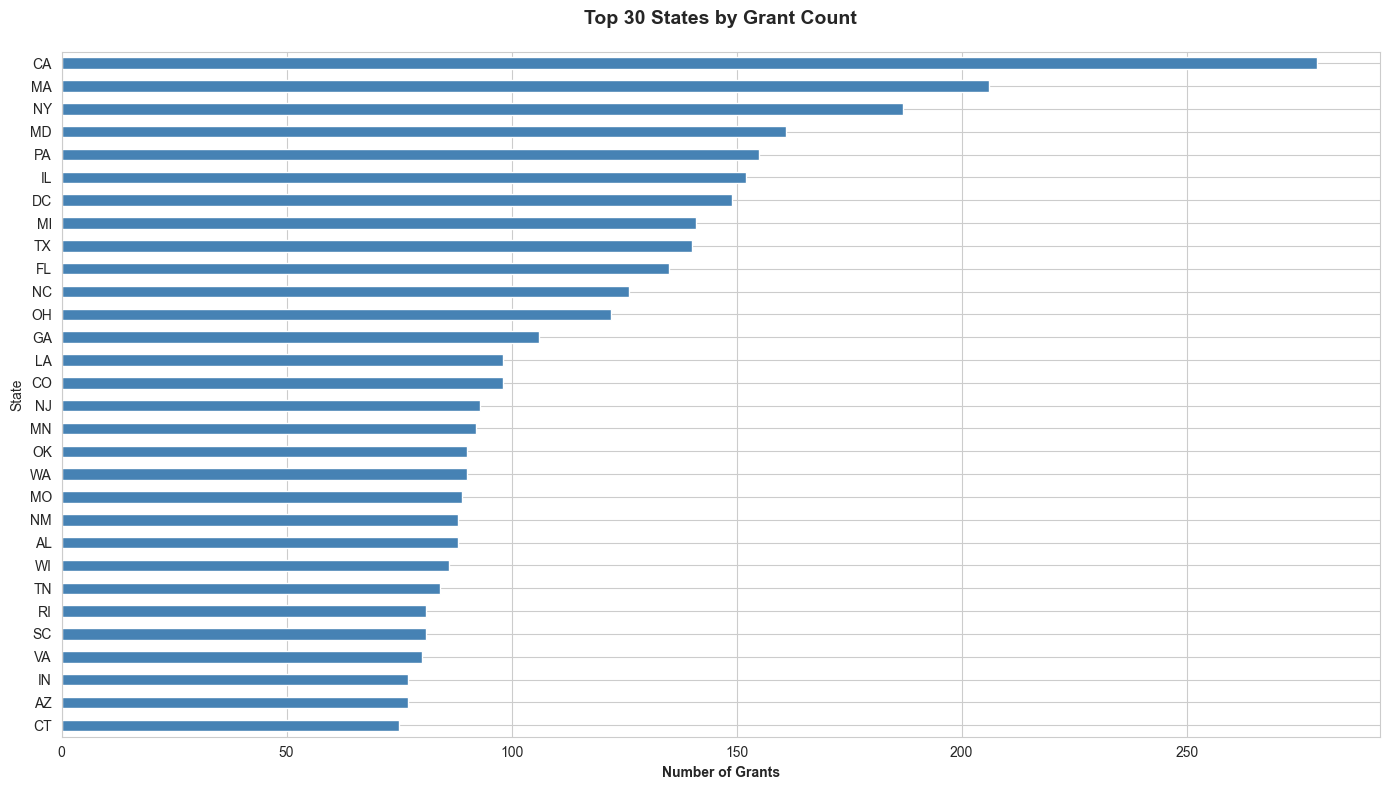

In [114]:
# Map of grant distribution
state_counts = df['State'].value_counts()

fig, ax = plt.subplots(figsize=(14, 8))
state_counts.head(30).plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Number of Grants', fontweight='bold')
ax.set_title('Top 30 States by Grant Count', fontsize=14, fontweight='bold', pad=20)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## Grant Amounts

In [135]:
# raw format
print("Sample grant amounts (raw):")
print(df['Awardee Amount'].head(10))

Sample grant amounts (raw):
0     $1,269,121
1       $225,000
2       $437,942
3       $713,466
4       $340,000
5     $1,150,000
6        $96,750
7       $985,898
8       $130,000
9    $11,523,951
Name: Awardee Amount, dtype: object


In [133]:
#clean currency
def clean_amount(x):
    if pd.isna(x):
        return np.nan
    return float(str(x).replace('$', '').replace(',', ''))

# cleaned version
df['amount_clean'] = df['Awardee Amount'].apply(clean_amount)

print("Cleaned amounts:")
print(df['amount_clean'].describe())

Cleaned amounts:
count    4.946000e+03
mean     1.473591e+06
std      3.716964e+06
min      1.000000e+00
25%      1.257170e+05
50%      3.720000e+05
75%      9.724008e+05
max      3.972596e+07
Name: amount_clean, dtype: float64


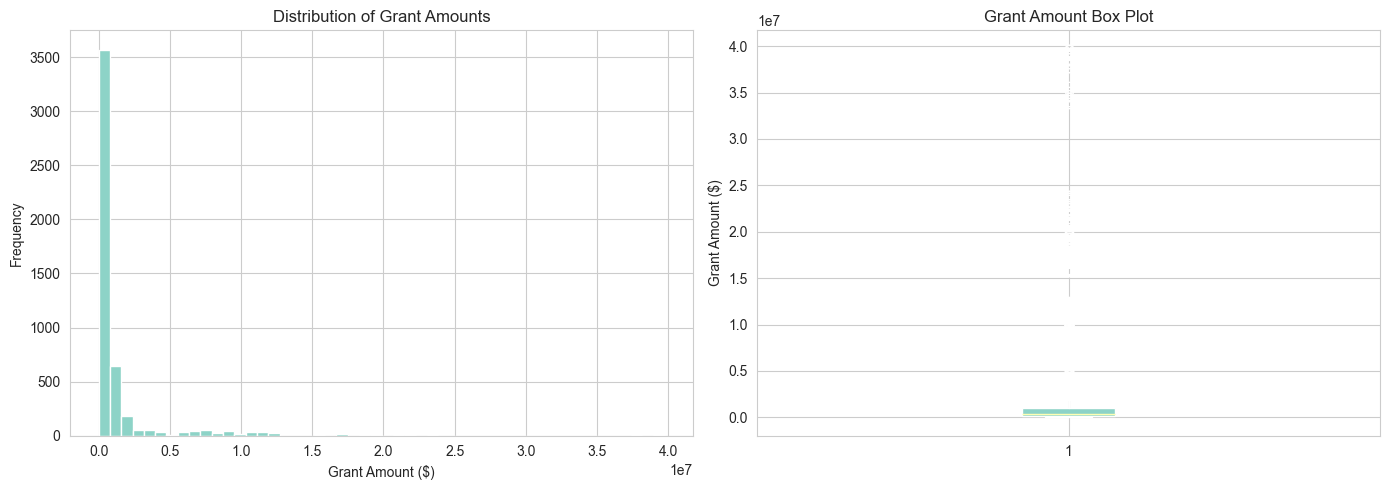

In [137]:
# distribution of grant sizes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['amount_clean'].dropna(), bins=50)
axes[0].set_xlabel('Grant Amount ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Grant Amounts')

# Box plot
axes[1].boxplot(df['amount_clean'].dropna(), patch_artist=True)
axes[1].set_ylabel('Grant Amount ($)')
axes[1].set_title('Grant Amount Box Plot')

plt.tight_layout()
plt.show()

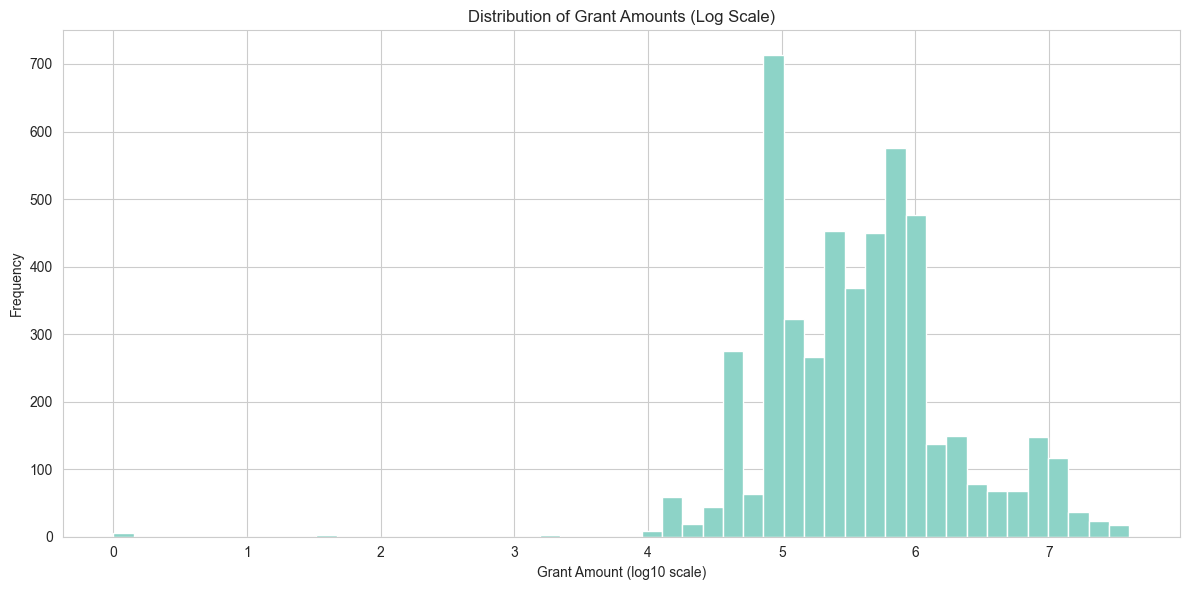

In [138]:
# log scaled plots
fig, ax = plt.subplots()
ax.hist(np.log10(df['amount_clean'].dropna()), bins=50)
ax.set_xlabel('Grant Amount (log10 scale)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Grant Amounts (Log Scale)')
plt.tight_layout()
plt.show()

## Total Funding by State

In [119]:
# Aggregate funding by state
state_funding = df.groupby('State').agg({
    'amount_clean': ['sum', 'mean', 'count']
}).reset_index()

state_funding.columns = ['State', 'total_funding', 'avg_grant', 'num_grants']
state_funding = state_funding.sort_values('total_funding', ascending=False)

print("Top 15 states by total funding:")
print(state_funding.head(15))

Top 15 states by total funding:
   State  total_funding     avg_grant  num_grants
5     CA    481251444.0  1.724916e+06         279
50    TX    383190193.0  2.737073e+06         140
39    NY    371441138.0  1.986316e+06         187
43    PA    286913042.0  1.851052e+06         155
17    IL    263417171.0  1.733008e+06         152
40    OH    253881664.0  2.080997e+06         122
10    FL    237759018.0  1.761178e+06         135
26    MI    232780528.0  1.650926e+06         141
23    MD    231047760.0  1.435079e+06         161
22    MA    224606628.0  1.090323e+06         206
32    NC    199347812.0  1.582125e+06         126
12    GA    190282578.0  1.795119e+06         106
36    NJ    175668724.0  1.888911e+06          93
21    LA    175336126.0  1.789144e+06          98
18    IN    168724879.0  2.191232e+06          77


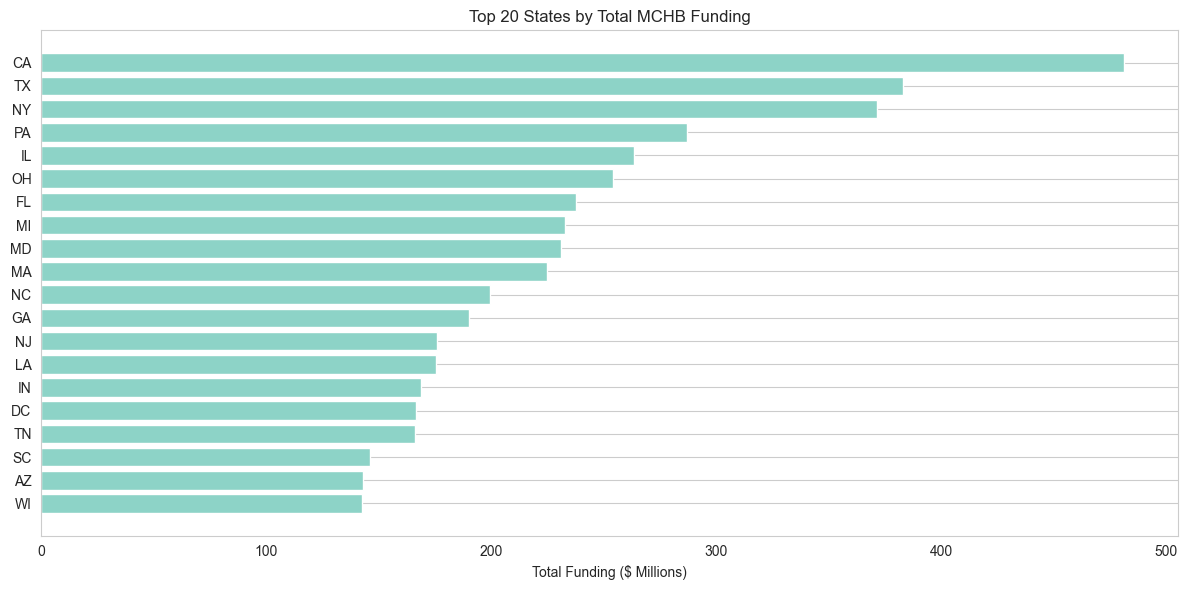

In [120]:
# Visualizing top states
fig, ax = plt.subplots()

top_20 = state_funding.head(20)
bars = ax.barh(range(len(top_20)), top_20['total_funding'].values / 1e6)
ax.set_yticks(range(len(top_20)))
ax.set_yticklabels(top_20['State'].values)
ax.invert_yaxis()

ax.set_xlabel('Total Funding ($ Millions)')
ax.set_title('Top 20 States by Total MCHB Funding')
ax.grid(axis='x')

plt.tight_layout()
plt.show()

## Program-Specific Analysis

In [121]:
#mental health programs
mental_health_programs = df[df['Program Name'].str.contains('Mental Health', case=False, na=False)]

print(f"Mental health-related grants: {len(mental_health_programs)}")
print(f"Total mental health funding: ${mental_health_programs['amount_clean'].sum():,.0f}")
print(f"\nStates with mental health programs: {mental_health_programs['State'].nunique()}")

Mental health-related grants: 114
Total mental health funding: $55,604,301

States with mental health programs: 43


In [122]:
# program categories
program_summary = df.groupby('Program Name').agg({
    'amount_clean': ['sum', 'count', 'mean']
}).reset_index()

program_summary.columns = ['Program', 'total_funding', 'num_grants', 'avg_grant']
program_summary = program_summary.sort_values('total_funding', ascending=False)

print("Top 10 programs by total funding:")
print(program_summary.head(10))

Top 10 programs by total funding:
                                               Program  total_funding  \
69                  Maternal and Child Health Services   3.256167e+09   
71   Maternal, Infant and Early Childhood Homevisit...   2.055583e+09   
41   Healthy Start Initiative-Eliminating Racial/Et...   6.170442e+08   
52   Leadership Education in Neurodevelopmental and...   2.060855e+08   
125  Universal Newborn Hearing Screening and Interv...   7.936790e+07   
111           State Maternal Health Innovation Program   5.459107e+07   
26                             EMSC Partnership Grants   4.322223e+07   
3    American Rescue Plan Act Funding for Home Visi...   3.999922e+07   
89         Pediatric Mental Health Care Access Program   3.522541e+07   
68   Maternal and Child Health Public Health Traini...   3.298942e+07   

     num_grants     avg_grant  
69          354  9.198211e+06  
71          332  6.191514e+06  
41          607  1.016547e+06  
52          320  6.440171e+05  
12

## Data Quality Check

In [123]:
# checking missing values
print("Missing values by column:")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing': missing,
    'Percent': missing_pct
})
print(missing_df[missing_df['Missing'] > 0])

Missing values by column:
Empty DataFrame
Columns: [Missing, Percent]
Index: []


In [124]:
# Check for duplicates
duplicates = df.duplicated(subset=['Grant Number']).sum()
print(f"Duplicate grant numbers: {duplicates}")

# Any grants with missing amounts?
missing_amounts = df['amount_clean'].isna().sum()
print(f"Grants with missing amounts: {missing_amounts}")

Duplicate grant numbers: 3107
Grants with missing amounts: 0


In [125]:
# Look for outliers in grant amounts
Q1 = df['amount_clean'].quantile(0.25)
Q3 = df['amount_clean'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['amount_clean'] < Q1 - 1.5*IQR) | (df['amount_clean'] > Q3 + 1.5*IQR)]

print(f"Number of outlier grants: {len(outliers)}")
print(f"\nLargest grants:")
print(df.nlargest(5, 'amount_clean')[['Grantee Name', 'State', 'Program Name', 'amount_clean']])

Number of outlier grants: 562

Largest grants:
                                 Grantee Name State  \
2643  PUBLIC HEALTH, CALIFORNIA DEPARTMENT OF    CA   
1812  PUBLIC HEALTH, CALIFORNIA DEPARTMENT OF    CA   
1006  Public Health, California Department of    CA   
86    Public Health, California Department of    CA   
3451  PUBLIC HEALTH, CALIFORNIA DEPARTMENT OF    CA   

                            Program Name  amount_clean  
2643  Maternal and Child Health Services    39725961.0  
1812  Maternal and Child Health Services    39660787.0  
1006  Maternal and Child Health Services    39383025.0  
86    Maternal and Child Health Services    39255586.0  
3451  Maternal and Child Health Services    39113905.0  


## Key Takeaways

**Summary of findings:**
1. Dataset has ~5,000 grants across US states and territories
2. Grant amounts vary widely
3. Some states get significantly more funding than others
4. Mental health programs are a small but important subset
5. Data is relatively clean but amounts need formatting
